In [67]:
import os
import re

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

from hnetwork import HNetwork
from visualisation import *

In [68]:
def apply_noise(pattern, noise):
    noise = (np.random.random(size=pattern.shape) > noise) * 2 - 1
    return pattern * noise

def compare_bitmaps(original, reconstructed):
    return original == reconstructed

In [71]:
datasets = {}
datasets_flat = {}
dataset_shapes = {}
for path in os.listdir('./data'):
    if not path.endswith('.csv'):
        continue
    name = path[:-4]
    shape = tuple(map(lambda x : int(x), reversed(re.search(r'\b\d+x\d+\b', name).group().split('x'))))
    patterns = np.genfromtxt(f'./data/{path}', delimiter=',')
    datasets[name] = patterns.reshape((-1,) + shape)
    datasets_flat[name] = patterns
    dataset_shapes[name] = shape

In [5]:
bitmaps = {}
for name, patterns in datasets.items():
    bitmaps[name] = []
    for pattern in patterns:
        image = draw_bitmap(pattern)
        bitmaps[name].append(image)

In [62]:
reconstructed = {}
for name, patterns in datasets_flat.items():
    hn = HNetwork(patterns[0].shape[0], train_rule='hebb', update_mode='async')
    hn.fit(patterns, lr=1e-3, epochs=100)
    reconstructed[name] = []
    for pattern in patterns:
        noisy = apply_noise(pattern, noise=0.02)
        pred = hn.predict(noisy, epochs=10)
        reconstructed[name].append(pred.reshape(dataset_shapes[name]))
    reconstructed[name] = np.array(reconstructed[name])

In [65]:
name = list(datasets.keys())[1]
name

'large-25x25'

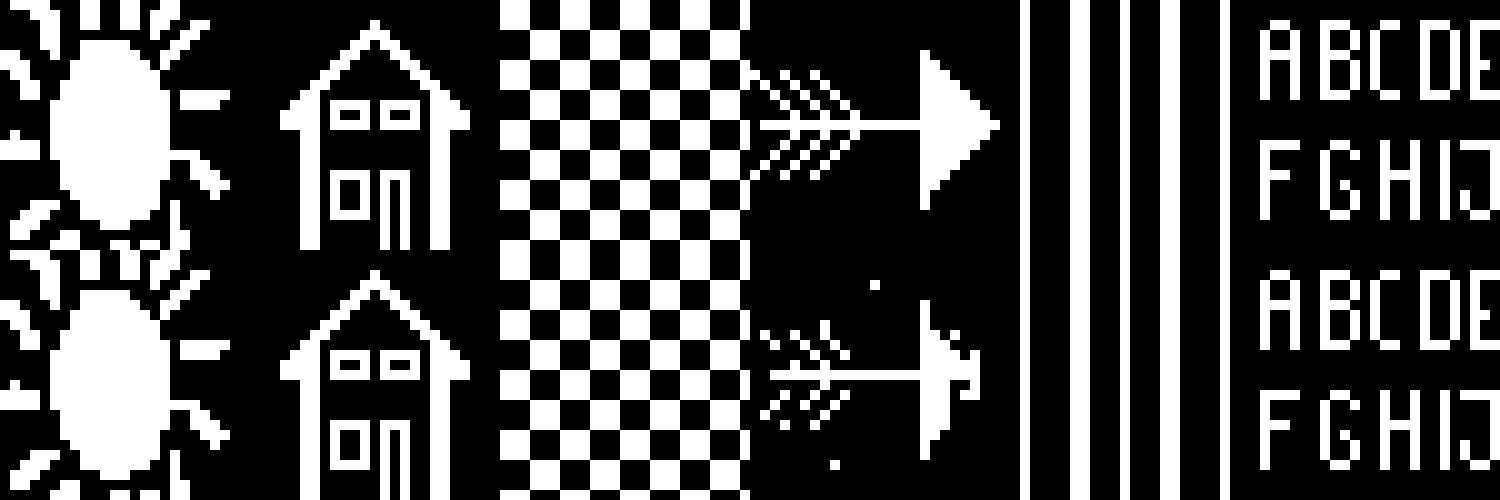

In [66]:
img = draw_comparison(datasets[name], reconstructed[name])
img

In [61]:
img.save(f"./oja_async_{name.replace('-', '')}.png")